In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv("/content/drive/My Drive/ML_DATASETS/datasets/OSL Datasets/Lesson_5/Datasets/driver-data.csv")

In [40]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [42]:
from sklearn.cluster import KMeans

In [43]:
kmeans = KMeans(n_clusters=3)

In [44]:
kmeans.fit(df.drop('id',axis=1))
print(kmeans.labels_)

[0 0 0 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
predicted = kmeans.labels_

In [46]:
predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [47]:
df['cluster'] = predicted
df.head()

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0


In [48]:
df.sample(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
330,3423313041,63.62,41,0
1583,3423312467,73.97,3,0
706,3423312015,50.18,8,0
2356,3423313600,41.64,1,0
843,3423311056,28.94,4,0


In [49]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

Text(0.5, 1.0, 'Before clustering')

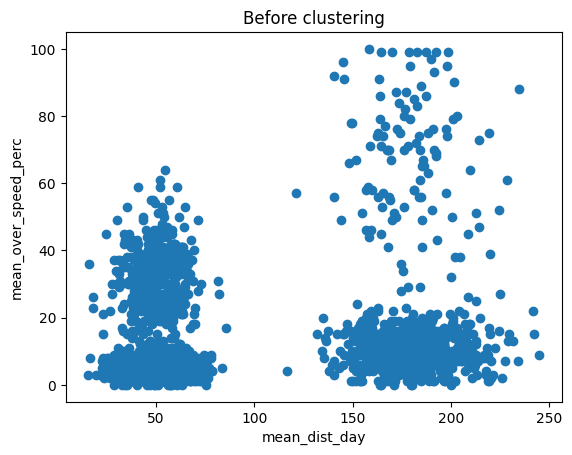

In [50]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.ylabel("mean_over_speed_perc")
plt.xlabel("mean_dist_day")
plt.title("Before clustering")

Plot the Clusters with their Centroids

Text(0.5, 1.0, 'After clustering')

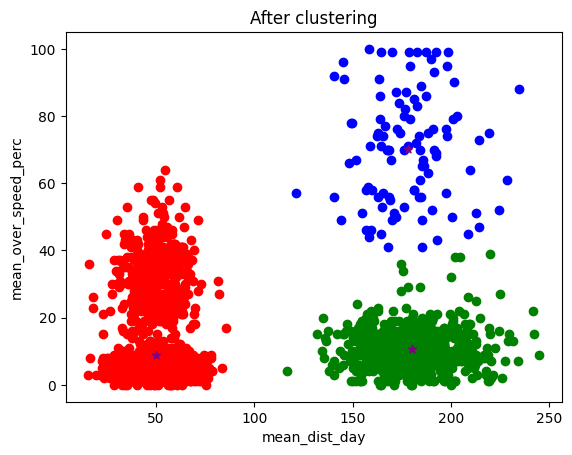

In [51]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='red')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='green')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='blue')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel("mean_dist_day")
plt.ylabel("mean_over_speed_perc")
plt.title("After clustering")

Decide the Optimal Number of Clusters

It's a popular technique that involves running k-means clustering for a set of k clusters (let's say 1 to 10) and calculating the sum of
squared distances from each point to its assigned center (inertia).
When the inertias are plotted and the plot looks like an arm, the “elbow” (the point of inflection on the curve) is the best value of k.
Take k = 1 to 10 and append them in a list

In [56]:
sse = []
k_rng = range(1,10)
for i in k_rng:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.drop('id',axis=1))
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [57]:
sse

[12185533.825627975,
 1316511.33094772,
 992634.0606702471,
 719601.0859909919,
 534750.9914553058,
 372830.1300230144,
 319906.44588488585,
 276883.98479975923,
 252669.33390844532]

Text(0, 0.5, 'inertia')

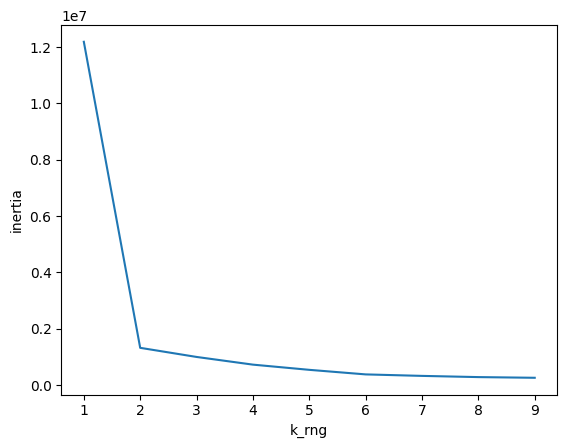

In [59]:
plt.plot(k_rng,sse)
plt.xlabel("k_rng")
plt.ylabel('inertia')

In [60]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('id',axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [64]:
df['cluster_2'] = kmeans.labels_
df.head()

,id,mean_dist_day,mean_over_speed_perc,cluster,cluster_2
0,3423311935,71.24,28,0,0
1,3423313212,52.53,25,0,0
2,3423313724,64.54,27,0,0
3,3423311373,55.69,22,0,0
4,3423310999,54.58,25,0,0


Text(0.5, 1.0, 'After clustering')

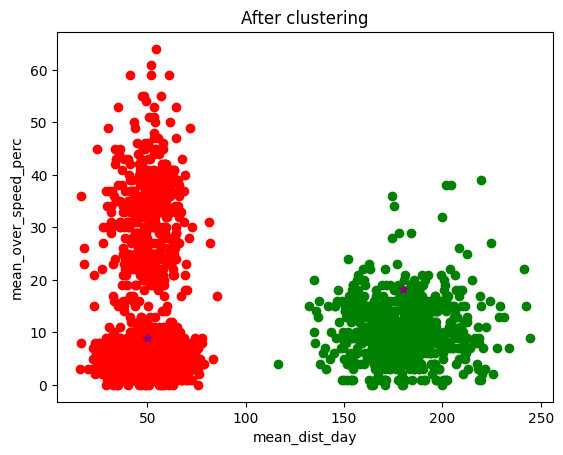

In [65]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]


plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='red')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='green')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel("mean_dist_day")
plt.ylabel("mean_over_speed_perc")
plt.title("After clustering")